In [1]:
import os
import airfrans as af
import numpy as np
import matplotlib.pyplot as plt

In [2]:
directory_name='Dataset'
if not os.path.isdir(directory_name):
    af.dataset.download(root = ".", file_name = directory_name, unzip = True, OpenFOAM = False)

In [3]:
dataset_list, dataset_name = af.dataset.load(root = directory_name, task = 'scarce', train = True)

Loading dataset (task: scarce, split: train): 100%|██████████| 200/200 [00:36<00:00,  5.46it/s]


In [10]:
all_velocity_magnitudes = []
average_velocities = []

for simulation_name in dataset_name:
    try:
        simulation = af.Simulation(root=directory_name, name=simulation_name, T=298.15)
        velocity_magnitudes = np.linalg.norm(simulation.velocity, axis=1)
        all_velocity_magnitudes.extend(velocity_magnitudes)

        average_velocity = np.mean(velocity_magnitudes)
        average_velocities.append(average_velocity)

    except Exception as e:
        print(f"Error processing simulation {simulation_name}: {e}")

In [11]:
overall_average_velocity = np.mean(average_velocities)
print(f"Overall average velocity: {overall_average_velocity}")

Overall average velocity: 50.57763393995512


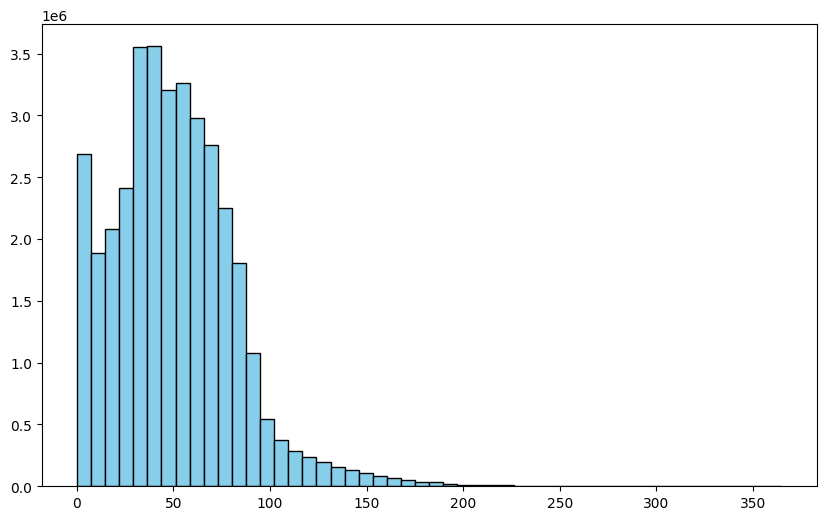

In [13]:
# Create the velocity distribution plot
plt.figure(figsize=(10, 6))
plt.hist(all_velocity_magnitudes, bins=50, color='skyblue', edgecolor='black')
plt.show()

In [5]:
all_pressures = []
all_nu_t = []

for simulation_name in dataset_name:
    try:
        simulation = af.Simulation(root=directory_name, name=simulation_name, T=298.15)
        all_pressures.extend(simulation.pressure)
        all_nu_t.extend(simulation.nu_t)

    except Exception as e:
        print(f"Error processing simulation {simulation_name}: {e}")

: 

In [ ]:
# Create the pressure distribution plot
plt.figure(figsize=(10, 6))
plt.hist(all_pressures, bins=50, edgecolor='black', color='skyblue')
plt.show()

In [ ]:
# Create the turbulent viscosity distribution plot
plt.figure(figsize=(10, 6))
plt.hist(all_nu_t, bins=50, density=True, alpha=0.7, color='salmon', edgecolor='black', label='Turbulent Viscosity')
plt.xlabel('Turbulent Viscosity (m²/s)')
plt.ylabel('Probability Density')
plt.title('Distribution of Turbulent Viscosity')
plt.grid(True)
plt.legend()
plt.show()